### Pyber Data Analysis
* There appears to be a supply and demand correlation between the number of drivers and the average fare. Fares appear to be more expensive in locations where there are less drivers and vice versa.

* There is a larger percentage or urban drivers (80.9%), but they account for a smaller percentage of the total rides (68.4%) and an even small percentage of total fares (62.7%). Urban cities are more advantageous for the rider as opposed to the driver.

* The drivers in the suburban and rural areas complete more rides per driver (as a % of all rides). Suburban drivers account for 16.5% of drivers, 26.3% of total rides and 30.5% of total fares. Rural drivers make up 2.6% of drivers, 5.3% of rides and 6.8% of total fares. Suburban and rural towns appear to be a "driver's market".
-----

In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

cd = pd.read_csv(city_data_to_load)
rd = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
df = rd.merge(cd, on="city", how='outer')

# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

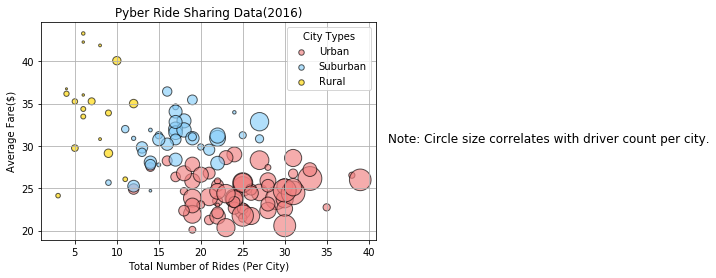

In [16]:
# Obtain the x and y coordinates for each of the three city types
urban = df.loc[df['type'] == "Urban"]
suburban = df.loc[df['type'] == "Suburban"]
rural = df.loc[df['type'] == "Rural"]

urban_rides = urban.groupby("city")["ride_id"].count()
suburban_rides = suburban.groupby("city")["ride_id"].count()
rural_rides = rural.groupby("city")["ride_id"].count()

urban_drivers = urban.groupby("city")["driver_count"].sum()
suburban_drivers = suburban.groupby("city")["driver_count"].sum()
rural_drivers = rural.groupby("city")["driver_count"].sum()

urban_fare = urban.groupby('city')["fare"].mean()
suburban_fare = suburban.groupby('city')["fare"].mean()
rural_fare = rural.groupby('city')["fare"].mean()


# Build the scatter plots for each city types
plt.scatter(urban_rides, urban_fare, marker="o", facecolors="lightcoral", edgecolors="black",
            s=urban_drivers*.25, alpha=0.65, label="Urban")
plt.scatter(suburban_rides, suburban_fare, marker="o", facecolors="lightskyblue", edgecolors="black",
            s=suburban_drivers*.5, alpha=0.65, label="Suburban")
plt.scatter(rural_rides, rural_fare, marker="o", facecolors="gold", edgecolors="black",
            s=rural_drivers, alpha=0.65, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.grid()

# Create a legend
lgnd = plt.legend(title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.suptitle("Note: Circle size correlates with driver count per city.", x=1.3, y=.5)

# Save Figure
plt.savefig("Data/Pyber-Ride-Sharing-Data-2016.png")

In [5]:
# Show plot
plt.show()

## Total Fares by City Type

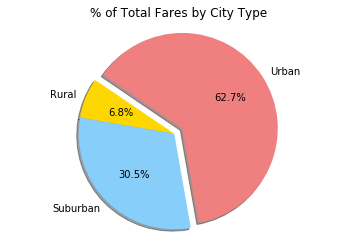

In [6]:
# Calculate Type Percents
urban_fare_total = urban.fare.sum()
suburban_fare_total = suburban.fare.sum()
rural_fare_total = rural.fare.sum()

city_type = ["Urban", "Rural", "Suburban"]
colors = ["lightcoral", "gold", "lightskyblue"]
fares_by_city = np.array([urban_fare_total, rural_fare_total, suburban_fare_total], dtype=float)
explode = (.1,0,0)

# Build Pie Chart
plt.pie(fares_by_city, explode=explode, colors=colors, labels=city_type, 
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
# Save Figure
plt.savefig("Data/Total-Fares-City-Type.png")

In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

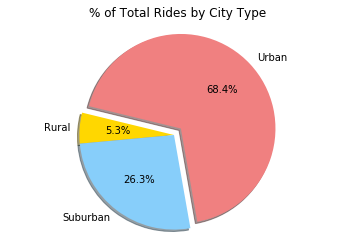

In [8]:
# Calculate Ride Percents
urban_ride_total = urban.ride_id.count()
suburban_ride_total = suburban.ride_id.count()
rural_ride_total = rural.ride_id.count()

rides_by_city = np.array([urban_ride_total, rural_ride_total, suburban_ride_total], dtype=float)
explode = (.1,0,0)
# Build Pie Chart
plt.pie(rides_by_city, explode=explode, colors=colors, labels=city_type, 
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
# Save Figure
plt.savefig("Data/Total-Rides-City-Type.png")

In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

(-1.1209128734926854,
 1.2111054580470828,
 -1.0960571142968465,
 1.1158855920028157)

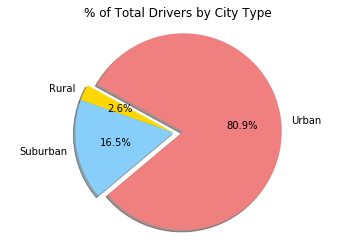

In [10]:
# Calculate Driver Percents     

unique = df.drop_duplicates(subset="city")

urban_unique = unique.loc[unique['type'] == "Urban"]
suburban_unique = unique.loc[unique['type'] == "Suburban"]
rural_unique = unique.loc[unique['type'] == "Rural"]

urban_driver_total = urban_unique.driver_count.sum()
suburban_driver_total = suburban_unique.driver_count.sum()
rural_driver_total = rural_unique.driver_count.sum()

driver_by_city = np.array([urban_driver_total, rural_driver_total, suburban_driver_total], dtype=float)
explode = (.1,0,0)

# Build Pie Charts
plt.pie(driver_by_city, explode=explode, colors=colors, labels=city_type, 
        autopct="%1.1f%%", shadow=True, startangle=220)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure


In [11]:
# Show Figure
plt.show()